In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning-Random_forest")

In [3]:
hr_data=pd.read_csv("HR_comma_sep.csv")

In [4]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#most of the columns above correspond to HR related matrices
#using this data set , build a classification model to predict if an employee will leave an organization or not .
#we have a 'left' column where we come to know how many employees have left the company.


In [6]:
#first lets see if we have any missing values in our data.
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [9]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [10]:
hr_data['salary'].head()
#ITS A NON NUMERIC VARIABLE

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [11]:
#before we build our classifier model, Let us split the dataset into a predictor matrix and a target column.
#since we are predicting the column left in our data set. so we shall not include it in the predictor matrix
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [12]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [13]:
#we see that there are non  numeric columns.
#convert non numeric to numeric
#the way to do that is
#1-one hot encode
#2-Create dummy variables


In [14]:
X=pd.get_dummies(X)

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
#we create test and train components
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [17]:
#for building bagging enemble , we will need to import two classes.
#one is bagging class which is in the ensemble model and another is the decision tree class which is in the tree model
#we will need the Decision treeclassifier as Bagged tree classifier is used.
#bagging classifier is a general class.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
#here we see that we are using decisoon tre classifier for doing the bagging class
#oob_score controls if the out-of-bag error can be computed or not
clf=BaggingClassifier(oob_score=True,n_jobs=1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [19]:
#we need to fit our bagging tree ensemble
clf.fit(X_train,y_train)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [20]:
#lets take a look at out of bag error score
clf.oob_score_

0.9876656388032335

In [21]:
clf.score(X_test,y_test)

0.986

In [22]:
#We may want to do parameter tuning for some of the parameter in the bagging tree classifier
#here n_estimators here is the number of trees wewant.
#out-of-bag error is a good proxy for Out-of-sample accuracy of the ensemble tree models
#10 is the multiple, 300  is the total count and 20 is the step
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                         base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = ' +str(w))
    print ('OOB score is '+str(oob))
    print ('**************************')
    

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9834152846070506
**************************
For n_estimators = 30
OOB score is 0.9887490624218684
**************************
For n_estimators = 50
OOB score is 0.9894157846487207
**************************
For n_estimators = 70
OOB score is 0.9896658054837904
**************************
For n_estimators = 90
OOB score is 0.9899991665972164
**************************
For n_estimators = 110
OOB score is 0.9899991665972164
**************************
For n_estimators = 130
OOB score is 0.9903325277106425
**************************
For n_estimators = 150
OOB score is 0.9904992082673556
**************************
For n_estimators = 170
OOB score is 0.9902491874322861
**************************
For n_estimators = 190
OOB score is 0.9901658471539295
**************************
For n_estimators = 210
OOB score is 0.9902491874322861
**************************
For n_estimators = 230
OOB score is 0.9902491874322861
**************************
For n_estimators = 25

In [23]:
#here we can say that , a good number of trees in a bad classifer is 150
#we see that till 150 the values increase and after that it decreases. so we can say 150

In [24]:
#Finalizing on a tree modelwith 150 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,
                     base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [25]:
#feature importance'
clf.estimators_
#we get the estimators for all the trees

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                       

In [26]:
print(clf.estimators_[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1859118377, splitter='best')


In [27]:
print(clf.estimators_[0].feature_importances_)
#here we get the feature importance of the first tree

[5.05185266e-01 1.32251724e-01 1.09587124e-01 7.25383689e-02
 1.56214185e-01 9.76820763e-04 3.25164961e-04 9.23689326e-04
 1.08236025e-03 2.53569257e-03 4.89440705e-04 1.25078175e-03
 8.91752891e-04 8.14953601e-04 2.43254883e-03 2.96508657e-03
 3.16484751e-03 5.68842690e-04 4.96944845e-03 8.31900643e-04]


In [28]:
#we can extract feature imporatnce from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [29]:
#now lets convert our summarized feature into a series object
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [30]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494260
last_evaluation          0.138175
time_spend_company       0.137465
number_project           0.110373
average_montly_hours     0.097373
dept_technical           0.003132
salary_low               0.003084
dept_support             0.002837
dept_sales               0.002542
salary_medium            0.002088
Work_accident            0.001566
dept_IT                  0.001562
dept_accounting          0.001390
salary_high              0.000880
dept_marketing           0.000712
dept_product_mng         0.000667
dept_RandD               0.000642
dept_hr                  0.000590
dept_management          0.000490
promotion_last_5years    0.000174
dtype: float64

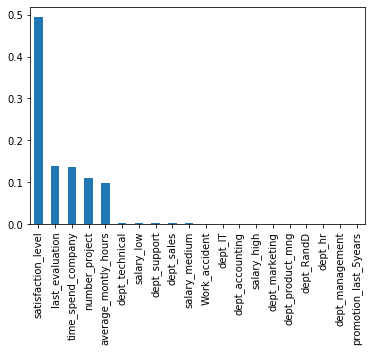

In [31]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [32]:
#RANDOM FOREST CLASSIFIERS
#fitting a random forest classifier on the same data set

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [36]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [37]:
clf.oob_score_

0.9905825485457121

In [38]:
for w in range(10,300,20):
    clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = ' +str(w))
    print ('OOB score is '+str(oob))
    print ('**************************')

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9832486040503375
**************************
For n_estimators = 30
OOB score is 0.9894991249270773
**************************
For n_estimators = 50
OOB score is 0.990082506875573
**************************
For n_estimators = 70
OOB score is 0.9905825485457121
**************************
For n_estimators = 90
OOB score is 0.9904992082673556
**************************
For n_estimators = 110
OOB score is 0.9908325693807817
**************************
For n_estimators = 130
OOB score is 0.9908325693807817
**************************
For n_estimators = 150
OOB score is 0.9905825485457121
**************************
For n_estimators = 170
OOB score is 0.9909992499374948
**************************
For n_estimators = 190
OOB score is 0.9909159096591382
**************************
For n_estimators = 210
OOB score is 0.9908325693807817
**************************
For n_estimators = 230
OOB score is 0.9908325693807817
**************************
For n_estimators = 250

In [39]:
#we can see the oob score increases till the number of estimators =190

In [40]:
#finalize a random forest of 190 trees
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [41]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=-1, oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [42]:
clf.oob_score_

0.9909159096591382

In [43]:
cc

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [44]:
#for random forest we directly get the feature importance and we dont need to run a loop as for bagged


In [45]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [46]:
imp_feat.sort_values(ascending=False)

satisfaction_level       0.313838
number_project           0.183968
time_spend_company       0.176501
average_montly_hours     0.151437
last_evaluation          0.124307
Work_accident            0.010184
salary_low               0.007224
salary_high              0.005606
dept_technical           0.003706
dept_sales               0.003536
salary_medium            0.003522
dept_support             0.002996
promotion_last_5years    0.001967
dept_IT                  0.001828
dept_RandD               0.001795
dept_accounting          0.001732
dept_hr                  0.001724
dept_management          0.001708
dept_marketing           0.001238
dept_product_mng         0.001181
dtype: float64

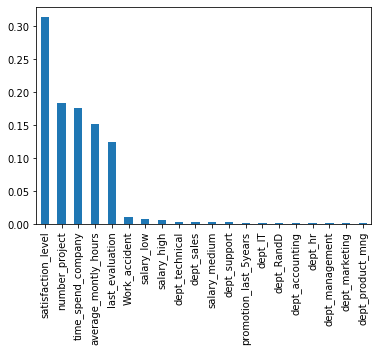

In [47]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [48]:
#Creating boosted tree assembles

In [49]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [50]:
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning-Random_forest")

In [51]:
hr_data=pd.read_csv('HR_comma_sep.csv')

In [52]:
#data of employeess leaving the company
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [54]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [55]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [56]:
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [57]:
hr_data['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [58]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [59]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [60]:
X=pd.get_dummies(X)

In [61]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
#now lets split or data into test and train'
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
clf=GradientBoostingClassifier(n_estimators=80,random_state=400)
#here we are taking a value of 80... later on we will do a grid search to figure out what could be a good value of the number 
#of trees in my gradient boosting clasifier

In [66]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
clf.score(X_test,y_test)

0.974

In [69]:
#now to tune the hyperparameters of a gradient boosted classifier we will use GradSearch CV
from sklearn.model_selection import GridSearchCV

In [70]:
mod=GridSearchCV(clf,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(X_train,y_train)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=80,
                                                  n_iter_no_change=None,
                                                  pres

In [71]:
mod.best_estimator_
#here best esitimators given in the output is 160

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
clf=GradientBoostingClassifier(n_estimators=160,random_state=400)
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='auto',
                           random_state=400, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
clf.score(X_test,y_test)

0.9743333333333334

In [74]:
clf.feature_importances_

array([5.42605861e-01, 9.87507037e-02, 1.14253186e-01, 7.42086956e-02,
       1.66362150e-01, 1.11344127e-03, 1.06925506e-04, 1.01338047e-04,
       1.22387807e-04, 8.47228502e-05, 3.08801164e-05, 5.33784404e-05,
       0.00000000e+00, 8.99324385e-05, 7.99401343e-06, 9.34317188e-05,
       2.88849992e-04, 6.12687452e-04, 1.11282520e-03, 6.08032336e-07])

In [75]:
#we get the arrays above.So now we shall convert arrays into Series and then assign it names
feature_imp=pd.Series(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(ascending=False)

satisfaction_level       5.426059e-01
time_spend_company       1.663621e-01
number_project           1.142532e-01
last_evaluation          9.875070e-02
average_montly_hours     7.420870e-02
Work_accident            1.113441e-03
salary_low               1.112825e-03
salary_high              6.126875e-04
dept_technical           2.888500e-04
dept_RandD               1.223878e-04
promotion_last_5years    1.069255e-04
dept_IT                  1.013380e-04
dept_support             9.343172e-05
dept_product_mng         8.993244e-05
dept_accounting          8.472285e-05
dept_management          5.337844e-05
dept_hr                  3.088012e-05
dept_sales               7.994013e-06
salary_medium            6.080323e-07
dept_marketing           0.000000e+00
dtype: float64

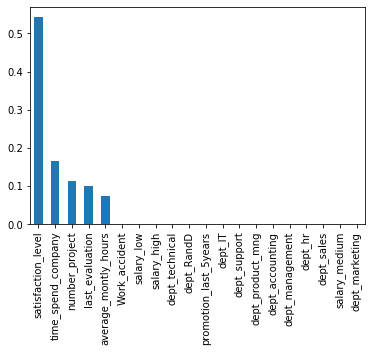

In [76]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

In [77]:
#other thing we talked is the partial dependence plot with our ensemble models
#within scikit learn- sciket learn allows us to built partial dependance plot for gradient boosted ensemble
#its doesnt allow to us partial dependance plot of random forest or gradient trees
from sklearn.ensemble.partial_dependence import plot_partial_dependence

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)


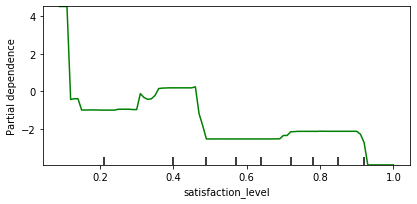

In [78]:
fig,axs=plot_partial_dependence(clf,X,[0],feature_names=X.columns.tolist())

#we will pass on the model we trained . the predictor matrix, and i will also tell with respect to which variable i want
#a partial dependence plot. Here iwill specify which pridictor i want to look at when i create the partial dependence plot.
# Remember in a partial dependacne plot y-axis is the target variable and x-axis is always the predictor.
# here i want to know how the target variable changes wrt the first predictor of the dataset

In [79]:
#graded assignment


In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import json

In [2]:
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine_learning-Random_forest/graded assignment")

In [3]:
os.getcwd()

'C:\\Users\\Darren savio dsouza\\Desktop\\jigsaw\\machine_learning-Random_forest\\graded assignment'

In [4]:
with open('amsterdam.json') as json_file:
    data = json.load(json_file)

In [5]:
data

{'host_listings_count': {'0': 1.0,
  '1': 1.0,
  '2': 1.0,
  '3': 2.0,
  '4': 1.0,
  '5': 1.0,
  '6': 1.0,
  '7': 1.0,
  '8': 3.0,
  '9': 1.0,
  '10': 1.0,
  '11': 1.0,
  '12': 1.0,
  '13': 1.0,
  '14': 1.0,
  '15': 1.0,
  '16': 1.0,
  '17': 1.0,
  '18': 2.0,
  '19': 1.0,
  '20': 1.0,
  '21': 1.0,
  '22': 1.0,
  '23': 3.0,
  '24': 1.0,
  '25': 1.0,
  '26': 1.0,
  '27': 1.0,
  '28': 1.0,
  '29': 1.0,
  '30': 1.0,
  '31': 1.0,
  '32': 2.0,
  '33': 1.0,
  '34': 3.0,
  '35': 1.0,
  '36': 1.0,
  '37': 1.0,
  '38': 24.0,
  '39': 1.0,
  '40': 1.0,
  '41': 1.0,
  '42': 1.0,
  '43': 2.0,
  '44': 1.0,
  '45': 1.0,
  '46': 36.0,
  '47': 1.0,
  '48': 1.0,
  '49': 1.0,
  '50': 1.0,
  '51': 1.0,
  '52': 1.0,
  '53': 1.0,
  '54': 1.0,
  '55': 2.0,
  '56': 1.0,
  '57': 2.0,
  '58': 1.0,
  '59': 1.0,
  '60': 1.0,
  '61': 1.0,
  '62': 2.0,
  '63': 1.0,
  '64': 1.0,
  '65': 7.0,
  '66': 1.0,
  '67': 1.0,
  '68': 1.0,
  '69': 1.0,
  '70': 1.0,
  '71': 1.0,
  '72': 1.0,
  '73': 29.0,
  '74': 1.0,
  '75': 1

In [6]:
from pandas import Series,DataFrame

In [7]:
dat1=DataFrame(data)

In [8]:
dat1.shape

(15181, 13)

In [9]:
dat1.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

In [10]:
dat1.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [11]:
dat1.count()

host_listings_count               15178
accommodates                      15181
bathrooms                         15163
bedrooms                          15169
guests_included                   15181
minimum_nights                    15181
number_of_reviews                 15181
calculated_host_listings_count    15181
price                             15181
latitude                          15181
longitude                         15181
room_type                         15181
instant_bookable                  15181
dtype: int64

In [12]:
dat1.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [13]:
dat1["latitude"].dtypes

dtype('float64')

In [14]:
dat1.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [15]:
dat1.price

0        $145.00
1         $88.00
10       $130.00
100       $90.00
1000      $39.00
10000    $118.00
10001    $129.00
10002    $130.00
10003    $135.00
10004     $94.00
10005    $110.00
10006    $120.00
10007     $60.00
10008     $95.00
10009    $125.00
1001      $90.00
10010    $180.00
10011    $138.00
10012    $130.00
10013    $185.00
10014     $95.00
10015     $75.00
10016     $65.00
10017    $100.00
10018     $99.00
10019    $175.00
1002     $110.00
10020    $125.00
10021    $110.00
10022    $130.00
          ...   
9972     $109.00
9973      $55.00
9974     $125.00
9975     $150.00
9976     $160.00
9977     $250.00
9978      $89.00
9979     $200.00
998       $60.00
9980     $260.00
9981     $150.00
9982     $550.00
9983     $280.00
9984      $85.00
9985     $115.00
9986      $85.00
9987      $90.00
9988      $95.00
9989      $80.00
999      $420.00
9990     $150.00
9991      $70.00
9992     $140.00
9993     $175.00
9994     $270.00
9995     $105.00
9996     $150.00
9997     $320.

In [16]:
dat1["price"]

0        $145.00
1         $88.00
10       $130.00
100       $90.00
1000      $39.00
10000    $118.00
10001    $129.00
10002    $130.00
10003    $135.00
10004     $94.00
10005    $110.00
10006    $120.00
10007     $60.00
10008     $95.00
10009    $125.00
1001      $90.00
10010    $180.00
10011    $138.00
10012    $130.00
10013    $185.00
10014     $95.00
10015     $75.00
10016     $65.00
10017    $100.00
10018     $99.00
10019    $175.00
1002     $110.00
10020    $125.00
10021    $110.00
10022    $130.00
          ...   
9972     $109.00
9973      $55.00
9974     $125.00
9975     $150.00
9976     $160.00
9977     $250.00
9978      $89.00
9979     $200.00
998       $60.00
9980     $260.00
9981     $150.00
9982     $550.00
9983     $280.00
9984      $85.00
9985     $115.00
9986      $85.00
9987      $90.00
9988      $95.00
9989      $80.00
999      $420.00
9990     $150.00
9991      $70.00
9992     $140.00
9993     $175.00
9994     $270.00
9995     $105.00
9996     $150.00
9997     $320.

In [17]:
dat1['price']=dat1['price'].str.replace('$',"")
dat1['price']=dat1['price'].str.replace(',',"")

In [18]:
print(dat1.head())

      host_listings_count  accommodates  bathrooms  bedrooms  guests_included  \
0                     1.0             6        1.0       2.0                1   
1                     1.0             2        1.0       1.0                1   
10                    1.0             2        1.0       1.0                1   
100                   1.0             5        1.0       4.0                1   
1000                  1.0             1        1.0       1.0                1   

      minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                  3                  4                               1   
1                  2                 17                               1   
10                 3                  0                               1   
100                5                  2                               1   
1000               1                 32                               1   

       price   latitude  longitude        room_type instant_bo

In [19]:
dat1.price.mean("price")

ValueError: No axis named price for object type <class 'type'>

In [24]:
dat1.price=pd.to_numeric(dat1.price)

In [25]:
dat1.price.mean()

134.79922271260128

In [26]:
round(dat1['price'].mean(),3)

134.799

In [27]:
round(dat1.price.mean(),3)

134.799

In [28]:
dat1["price"].max()

3142.0

In [29]:
dat1.describe(percentiles=[.99])

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
99%,47.000000,8.000000,2.500000,4.000000,5.000000,14.000000,173.200000,45.000000,440.000000,52.408910,4.996097
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


In [30]:
dat1[dat1['price']<=440].shape[0]

15031

In [31]:
dat2=dat1[dat1['price']<=440]

In [32]:
dat2.describe(percentiles=[.90])

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15028.000000,15031.000000,15013.000000,15019.000000,15031.000000,15031.00000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,3.368978,2.879383,1.116099,1.390439,1.498902,2.88364,17.842459,2.901603,129.974386,52.365318,4.889023
std,11.192743,1.300451,0.343436,0.839198,0.939973,7.24457,34.868321,8.826702,63.799025,0.015759,0.035005
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,19.000000,52.290308,4.753513
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,7.000000,1.000000,115.000000,52.364970,4.886354
90%,3.000000,4.000000,1.500000,2.000000,2.000000,4.00000,43.000000,3.000000,210.000000,52.383550,4.934756
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.00000,496.000000,91.000000,440.000000,52.426224,5.027689


In [33]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t


In [34]:
dat2.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [35]:
dat2["host_listings_count"].unique().tolist()

[1.0,
 34.0,
 2.0,
 5.0,
 27.0,
 36.0,
 13.0,
 24.0,
 4.0,
 12.0,
 3.0,
 16.0,
 43.0,
 6.0,
 106.0,
 103.0,
 32.0,
 47.0,
 29.0,
 9.0,
 0.0,
 7.0,
 25.0,
 10.0,
 15.0,
 18.0,
 11.0,
 28.0,
 8.0,
 21.0,
 22.0,
 nan,
 45.0]

In [36]:
dat2["bathrooms"].unique().tolist()

[1.0, 1.5, 2.5, 2.0, nan, 0.5, 0.0, 3.0, 3.5, 4.0, 8.0, 4.5, 5.0]

In [37]:
dat2["bedrooms"].unique().tolist()

[2.0, 1.0, 4.0, 3.0, 0.0, 5.0, nan, 6.0, 8.0, 9.0, 7.0, 10.0]

In [38]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15028.000000,15031.000000,15013.000000,15019.000000,15031.000000,15031.00000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,3.368978,2.879383,1.116099,1.390439,1.498902,2.88364,17.842459,2.901603,129.974386,52.365318,4.889023
std,11.192743,1.300451,0.343436,0.839198,0.939973,7.24457,34.868321,8.826702,63.799025,0.015759,0.035005
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,89.000000,52.355591,4.864840
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,7.000000,1.000000,115.000000,52.364970,4.886354
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.00000,18.000000,1.000000,150.000000,52.374814,4.907945
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.00000,496.000000,91.000000,440.000000,52.426224,5.027689


In [39]:
dat2.dropna(inplace=True)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689


In [41]:
dat2.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64

In [42]:
dat2.shape

(14998, 13)

In [43]:
latitude1=52.379189
longitude1=4.899431

In [44]:
latitude1=52.379189
longitude1=4.899431
import numpy as np
def haversine_np(longitude, latitude, longitude1, latitude1):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.
    
    """
    # convert decimal degrees to radians 
    longitude, latitude, longitude1, latitude1 = map(np.radians, [longitude, latitude, longitude1, latitude1])
    # haversine formula 
    dlon = longitude1 - longitude 
    dlat = latitude1 - latitude 
    a = np.sin(dlat/2.0)**2 + np.cos(latitude) * np.cos(latitude1) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km

In [45]:
dat2['d_center'] = haversine_np(dat2['longitude'],dat2['latitude'],longitude1,latitude1)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,d_center
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033,2.998582
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010,1.610995
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513,0.115801
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839,1.948924
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370,2.841338
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953,3.577086
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689,11.842162


In [47]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,2.142603


In [48]:
dat2.sort_values("d_center",ascending=True).head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,d_center
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,0.206638


In [49]:
dat2["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [50]:
pr=dat2[(dat2["room_type"]=="Private room") & (dat2["d_center"]<=1)]

In [51]:
dat2[(dat2["room_type"]=="Private room") & (dat2["d_center"]<=1)].shape[0]

298

In [52]:
pr["price"].mean()

118.09731543624162

In [53]:
dat2.query('room_type=="Private room" & d_center<=1').shape[0]

298

In [54]:
dat2.query('room_type=="Private room" & d_center<=1').agg({"price":'mean'})

price    118.097315
dtype: float64

In [55]:
X=pd.get_dummies(dat2)

In [56]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,d_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,2.142603,0,1,0,0,1


In [57]:
X.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'd_center', 'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'instant_bookable_f', 'instant_bookable_t'],
      dtype='object')

In [58]:
X.shape[1]

17

In [59]:
X=X.drop("price",axis=1)

In [60]:
X.shape[1]

16

In [61]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,52.371424,4.848644,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,52.312889,4.980151,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,52.395334,4.916701,2.142603,0,1,0,0,1


In [62]:
y=dat2['price']

In [63]:
y.shape[0]

14998

In [64]:
X.shape[0]

14998

In [65]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [66]:
X_train.shape

(10498, 16)

In [67]:
X_test.shape

(4500, 16)

In [68]:
y_train.shape

(10498,)

In [69]:
y_test.shape

(4500,)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [72]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)

In [73]:
clf.oob_score_

0.07610973518765479

In [74]:
clf.feature_importances_

array([0.0337621 , 0.03411216, 0.03051603, 0.03345823, 0.03668276,
       0.08134335, 0.14237126, 0.02910702, 0.1825945 , 0.18338676,
       0.17962646, 0.00349248, 0.00331477, 0.00088525, 0.01251401,
       0.01283285])

In [ ]:
for w in range(30,600,10):
    clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = ' +str(w))
    print ('OOB score is '+str(oob))
    print ('**************************')

For n_estimators = 30
OOB score is 0.06667936749857116
**************************
For n_estimators = 40
OOB score is 0.06887026100209563
**************************
For n_estimators = 50
OOB score is 0.0707753857877691
**************************
For n_estimators = 60
OOB score is 0.0718232044198895
**************************
